#Rearangement problem : 
Given a permutation P of length n such that 1<=P[i] <=n apears exactly once in P. Rearrange the values of P such a way that, for any element P[i], pos[P[i]] != i

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
# P = [1,3,4,2]
n = 4
# P = []
# for i in range(n):
#     P.append(random.(1,n))
# P

##generating an array of n random numbers in range [1,n]
# X = random.sample(range(1, 10000000), n)
# P = random.sample(range(1, n+1), n)
# print(X)
# print(P)
    
# pos = {}
# for i in range(n):
#     pos[P[i]] = i
# # for val in P:
# #     print(val, pos[val])
# # print("")

# printSolution(P)




In [ ]:
pos = dict()

In [ ]:
#storing original position

In [ ]:
def init(n):
    P = random.sample(range(1, n+1), n)
    #storing original position
    global pos
    pos = dict()
    for i in range(n):
        pos[P[i]] = i
    return P

In [ ]:
def fitness(P):
    cnt = 0
    n = len(P)

    freq = np.zeros(n+1)
    for i in range(n):
        freq[P[i]]+=1;

    for val in range(1, n+1):
        if(freq[val] > 1): cnt+=(freq[val]-1)
    
    for i in range(n):
        if pos[P[i]] == i : cnt+=1 

    return int(cnt)

In [ ]:
def satisfy(P):
    
    n = len(P)      
    freq = np.zeros(n+1)
    for i in range(n):
        freq[P[i]]+=1;

    for i in range(n):
        if freq[P[i]] > 1 :
            # print("Not acceptable, ", P[i] ,"apeared ", int(freq[P[i]]), "times")
            return False
        if pos[P[i]] == i :
            # print("Not acceptable, some element did not change its position.\n so, constraint is not satisfied")
            # print("printing the element which has same position as before:")
            # print("value : ",P[i], ",original position : ", pos[P[i]]+1, ", new position : ",i+1, end = '\n')
            return False
    return True


In [ ]:
# P = [4,3,2,2]
# printSolution(P)
# satisfy(P)
# fitness(P)

# P = random.sample(range(1, n+1), n)
# printSolution(P)
# satisfy(P)
# fitness(P)


In [ ]:
import copy

#randomly swap 2 elements of initial input
def randomSwap(P):
    P_copy = copy.deepcopy(P)
    n = len(P)

    # taking 2 random positions in range [0,n-1]
    [pos1,pos2] = random.sample(range(0, n), 2)
    tmp = P_copy[pos1]
    P_copy[pos1] = P_copy[pos2]
    P_copy[pos2] = tmp
    return P_copy 

In [ ]:
# import copy
# def singleFlip(P):
#   P_copy = copy.deepcopy(P) # simply copies the elements of P into P_copy
#   P = len(P_copy)

#   val = random.randint(1, n) # selects a random value
#   position = random.randint(0, n-1)  # selects a random position

#   P_copy[position] = val
#   return P_copy

In [ ]:
# print(singleFlip(np.asarray([1,2,3,4])))

In [ ]:

# def monteCarlo(P, n, maxSteps) :
#     if satisfy(P): return i,P

#     for i in range(maxSteps):
#         P_new = 
#         print("fitnnes = ", fitness(P))
#         # print(tmp)
#         if satisfy(P_new): return i,P_new
#     return "no solution"

# iterations ,solution = monteCarlo(4, 50)
# print("found solution in %d iteration(s)" %iterations)
# printSolution(solution)

In [ ]:
def printSolution(P):
    # sum = 0;
    # for i in range(n):
    #     sum+=(P[i]*X[i])
    
    # print("X :",X)
    print("P :",P)

    print("positions in original array (1 based index):")
    for i in range(n):
        if pos[P[i]] == i : print('0', end = ' ')
        else : print(pos[P[i]]+1, end = ' ')
    print("")
    print("positions after rearrangement (1 based index):")
    for i in range(n): 
        print(i+1, end =' ')
    print("")

    print("sum = ", sum)
    return sum

In [ ]:
def HillDescent(P,n ,maxSteps):
    x_axis=[]
    y_axis=[]

    #initialization
    # print(P)
    # first check if the initilization was the solution
    if satisfy(P): return [P, 0,0,x_axis,y_axis]
    
    #otherwise go for the loop
    for i in range(maxSteps):
        P_new = randomSwap(P) # now apply the action to get a new solution from the neighborhood
    
        x_axis.append(i)
        y_axis.append(fitness(P))

        if satisfy(P_new):
            return [P_new,i, fitness(P), x_axis, y_axis]
        if fitness(P_new) <= fitness(P):
            P = P_new  # otherwise P_new is your new solution
  
    # if it is here that means no solutions were found
    return [None, i, fitness(P), x_axis,y_axis]


8
n =  10 average iterations =  14
n =  50 average iterations =  104
n =  100 average iterations =  274
n =  200 average iterations =  572
n =  250 average iterations =  874
n =  500 average iterations =  1730
n =  600 average iterations =  2505
n =  1000 average iterations =  3938


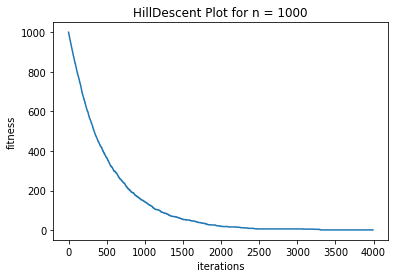

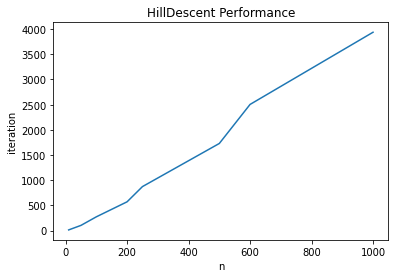

In [ ]:
avg_iterations = 0
avg_fitness = 0
n_observation = 5
# n = random.sample(range(2, 1000), 10)
n = np.asarray([10,50,100,200, 250,500, 600, 1000])
print(len(n))
iteration = []
for i in range(len(n)):
    for j in range(n_observation):
        P = init(n[i])
        P_new,iterations, fitness_val, x_axis,y_axis = HillDescent(P, n[i], 10*n[i])
        avg_iterations += iterations
        avg_fitness += fitness_val 
            
    avg_iterations /= n_observation
    avg_fitness /= n_observation
    iteration.append(int(round(avg_iterations)))
    print("n = ", n[i], "average iterations = ", round(avg_iterations)) 
    # print("average fitness : ", avg_fitness)  

N = 1000
P = init(N)
P_new,iterations, fitness_val, x_axis,y_axis = HillDescent(P, N, 10*N)

plt.plot(x_axis,y_axis) 
plt.xlabel('iterations')
plt.ylabel('fitness')
plt.title('HillDescent Plot for n = 1000')
plt.show()
plt.close()

plt.plot(n,iteration)
# plt.scatter(avg_iterations, avg_fitness, color = 'r')
plt.xlabel('n')
plt.ylabel('iteration')
plt.title('HillDescent Performance')
plt.show()


In [ ]:
testHillClimbing()

In [ ]:
#plot, scatter plot and bar plot example
x = [0,1,2,3]
y = [4,5,6,7]
plt.plot(x,y)
plt.show()
plt.scatter(x,y)
plt.show()
plt.bar(x,y)
plt.show()

#Recombination / Crossover
P1 = [0,1,3,4,5,2] 
P2 = [5,4,3,1,0,2] 
after crossover at position2 , P1_new = [0,1,3,1,0,2], P2_new = [5,4,3,4,5,2]


In [ ]:
def crossover(p1, p2):
    n = len(P1)
    crossoverPoint = random.randint(1,n-1)
    print(crossoverPoint)
    # print(p1[ : crossoverPoint] + p2[crossoverPoint : ])
    # print(p2[ : crossoverPoint] + p1[crossoverPoint : ])
    c1 = p1[ : crossoverPoint] + p2[crossoverPoint : ]
    c2 = p2[ : crossoverPoint] + p1[crossoverPoint : ]
    return c1,c2


In [ ]:
P1 = [0,1,3,4,5,2] 
P2 = [5,4,3,1,0,2]
c1,c2 = crossover(P1, P2)
print(c1)
print(c2)
# print(P1[:2])
# print(P2[2:])

In [ ]:
import random
def BasicGeneticAlgorithm(P, n, maxSteps, populationSize=10):
    if satisfy(P) : return P
    #initialization
    population = []
    for i in range(populationSize):
        p = random.sample(range(1,n+1), n)
        if satisfy(p) : return p
        population.append(p)
    #now check if the initial population has got the solution
    for ppl in population:
        return ppl
    #main loop
    for i in range(maxSteps):
        new_population = []
        #now start the loop for crossover
        for j in range(int(populationSize/2)):
            # p1 = population[random.randint(0,populationSize-1)] #select parent1
            # p2 = population[random.randint(0,populationSize-1)] #select parent2
            [p1,p2] = random.sample(range(0, populationSize-1), 2) 
            #generating list of 2 distinct random numbers in range [0,populationSize-1]
            # print(p1,p2)
            new_population.append(p1)
            new_population.append(p2)
            
            #add these new offspring to the new population
            c1,c2 = crossover(p1,p2)
        #end of crossover

        for ppl in new_population:
            if satisfy(ppl) : return ppl
        population = new_population 
        # accepts the new generation as new population
    return False

In [ ]:
n = 1000
P = init(n)
# print(P)
BasicGeneticAlgorithm(P,n,10*n,100)

avg_iterations = 0
avg_fitness = 0
n_observation = 10
n = 1000
for i in range(n_observation):
    P = init(n)
    P_new,iterations, fitness_val, x_axis,y_axis = BasicGeneticAlgorithm(P,n,10*n,100)
    avg_iterations += iterations
    avg_fitness += fitness_val 
    # plt.plot(x_axis,y_axis)
    # plt.show()
    # printSolution(P)
    # print(P_new)
    print("found solution in ",iterations,"iteration(s)" )

avg_iterations /= n_observation
print("average iterations : ", avg_iterations) 
print("average fitness : ", avg_fitness)  

# plt.plot(avg_iterations,avg_fitness)
# plt.show()

plt.plot(x_axis,y_axis)
plt.show()

In [ ]:
import random
def GeneticAlgorithm1(P, n, maxSteps, populationSize):
    #initialization
    population = []
    x_axis = []
    y_axis = []
    
    for i in range(populationSize):
        p_new = random.sample(range(1,n+1), n)
        population.append(p_new)
    #now check if the initial population has got the solution
    for ppl in population:
        if satisfy(ppl) :
            print('solved in initial step') 
            return [ppl, 1, x_axis, y_axis] 
    #main loop
    for i in range(maxSteps):
        new_population = []
        #now start the loop for crossover
        for j in range(int(populationSize/2)):
            # p1 = population[random.randint(0,populationSize-1)] #select parent1
            # p2 = population[random.randint(0,populationSize-1)] #select parent2
            [p1,p2] = random.sample(range(0, populationSize-1), 2) 
            #generating list of 2 distinct random numbers in range [0,populationSize-1]
            # print(p1,p2)
            # there is a risk that we might select same parents p1==p2
            c1,c2=crossover(p1,p2)
            #add these new offspring to the new population
            new_population.append(c1)
            new_population.append(c2)
        #end of crossover

        for ppl in new_population:
            if satisfy(ppl) : return [ppl,i, x_axis, y_axis]
        
        #selection according to fitness Elitism / Exploitation
        #population = new_population
        population_merged = population + new_population
        population_merged.sort(key=fitness)
        population = population_merged[:populationSize]

        x_axis.append(i)
        y_axis.append(fitness(population[0]))
    
    return [None, maxSteps, x_axis, y_axis] 

In [ ]:
def testGA():
    avg_iterations = 0
    avg_fitness = 0
    n_observation = 5
    # n = random.sample(range(2, 1000), 10)
    n = np.asarray([10,50,100,200, 250,500, 600, 1000, 1000])
    print(len(n))
    iteration = []
    for i in range(len(n)):
        for j in range(n_observation):
            P = init(n[i])
            P_new,iterations, x_axis,y_axis = GeneticAlgorithm1(P, n[i], 6*n[i], 10)
            avg_iterations += iterations

        avg_iterations /= n_observation
        # avg_fitness /= n_observation
        iteration.append(int(round(avg_iterations)))
        # print("n = ", n[i], "average iterations = ", round(avg_iterations)) 
        # print("average fitness : ", avg_fitness)  

    N = 1000
    P = init(N)
    P_new,iterations, x_axis,y_axis = GeneticAlgorithm1(P, N, 5*N, 1)

    plt.plot(x_axis,y_axis) 
    plt.xlabel('iterations')
    plt.ylabel('fitness')
    plt.title('Genetic Algorithm  Plot for n = 1000')
    plt.show()
    plt.close()

    plt.plot(n,iteration)
    # plt.scatter(avg_iterations, avg_fitness, color = 'r')
    plt.xlabel('n')
    plt.ylabel('iteration')
    plt.title('Genetic Algorithm Performance')
    plt.show()
    
    # n = 100000
    # P = init(n)
    # P1, iterations, x_axis, y_axis = GeneticAlgorithm1(P, n, 10*n, 10)
    # print(P1)
    # print('solved in ',iterations, 'iteration(s)')

    # plt.plot(x_axis,y_axis)
    # plt.show()
    # print(len(x_axis))

9
solved in initial step
solved in initial step
solved in initial step
solved in initial step
solved in initial step
solved in initial step
solved in initial step
solved in initial step
solved in initial step
solved in initial step
solved in initial step
solved in initial step
solved in initial step
solved in initial step
solved in initial step
solved in initial step
solved in initial step
solved in initial step
solved in initial step
solved in initial step
solved in initial step
solved in initial step
solved in initial step
solved in initial step
solved in initial step
solved in initial step
solved in initial step
solved in initial step
solved in initial step
solved in initial step
solved in initial step
solved in initial step
solved in initial step
solved in initial step
solved in initial step
solved in initial step
solved in initial step
solved in initial step
solved in initial step
solved in initial step
solved in initial step
solved in initial step
solved in initial step
solved in

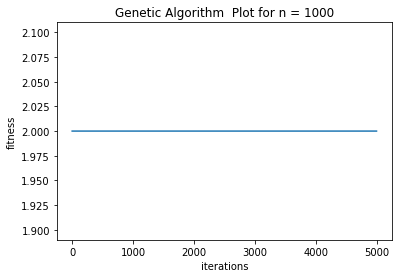

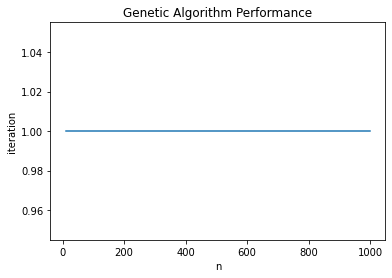

In [ ]:
testGA()